# Imports

In [77]:
from typing import TypedDict, Optional, Dict,Annotated ,List
from langgraph.graph import StateGraph ,START,END
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langgraph.graph.message import  add_messages
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph
from langchain_core.messages import HumanMessage,SystemMessage 
from pydantic import  BaseModel,Field
from Prompts import  Prompts

# LLM

In [78]:
API_KEY="LNDn2rbGUIGZznn1NXT7U4VcADf-d"
ENDPOINT="https://cloud.olakrutrim.com/v1"
MODEL_NAME="Llama-3.3-70B-Instruct"

llm = ChatOpenAI(api_key=API_KEY, base_url=ENDPOINT, model=MODEL_NAME)


Buisness need 
Gather and Analyze business requirments 
Deffine scope and Granularity 
Identify Fact Tables and Their Measures 
Define Dimensions and Conformed Dimensions
Design the Star Schema Structure
Optimize for Performance and Scalability
Validate, Test, and Document

# Pydantic Models

In [79]:
class BuisnessNeedPreProcessed(BaseModel):
    conversions:Annotated[List[str], Field(description="Conversations as stored")]
    processed_technical_conversions:Annotated[List[str],Field(description="")]

In [80]:
class GranularityScope(BaseModel):
    conversions:Annotated[str, Field(description="Conversations as stored")]

In [81]:
class SchemaDesign(BaseModel):
    conversions:Annotated[str, Field(description="Conversations as stored")]

In [82]:
class PerformanceOptimization(BaseModel):
    pass

In [83]:
class ErDiagram(BaseModel):
    pass

# Codd State

In [84]:
class CoddState(BaseModel):
    business_need: Annotated[str, Field(description="Original raw business need text as provided by the client")]
    business_need_pre_processed: Annotated[str, Field(description="The pre-processed version of the business need with key points extracted")]
    granularity_scope: Annotated[str, Field(description="Defined granularity and scope of the business process for the schema")]
    schema_design: Annotated[str, Field(description="The designed star schema including fact and dimension definitions")]
    performance_optimization: Annotated[str, Field(description="Details on indexing, partitioning, and aggregation strategies to optimize performance")]
    er_diagram: Annotated[str, Field(description="Information about the generated ER diagram for the schema")]
    documentation: Annotated[str, Field(description="Documentation summarizing the design, decisions, and maintenance guidelines")]
    current_stage: Annotated[str, Field(description="Current processing stage in the Codd pipeline")]
    error: Annotated[str, Field(description="Defined granularity and scope of the business process for the schema")]

# Nodes of graph

In [85]:
def call_model(state: MessagesState):
    
    def pretty_print(messages):
        print("===Pritning state , hold tight=======") 
        print(state)
        print("===The loop isn't looping please wait===") 
        for msg in messages:
            print("=======")
            print(msg)
            print("=======")
    
    pretty_print(state["messages"])
    response = llm.invoke(state["messages"])
    return {"messages": response}

# Edges of Graph

# Config Thread

In [86]:
config = {"configurable": {"thread_id": "abc123"}}

In [87]:

config_234 = {"configurable": {"thread_id": "abc234"}}

# Graph of the workflow

In [88]:
workflow = StateGraph(state_schema=MessagesState)
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

# Complie the Workflow with memory

In [89]:
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

# Display the graph

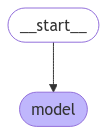

In [90]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

# Test and Run it 

### Run on same thread

In [91]:
query = "Hi! I'm Bob."
input_messages = [SystemMessage(Prompts.gen_analysis_business_need()),HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()  

===Pritning state , hold tight=======
{'messages': [SystemMessage(content='\n                    You are Codd, a knowledgeable and playful chatbot specialized in Database Administration and Data Modeling. Your mission is to help users refine their business needs for designing an OLAP data store by engaging in a friendly, clear, and jargon-free conversation. Your responses should feel warm and human, not robotic. Follow these guidelines:\n\n                    1. **Listen Carefully:** When a business need is provided, read it thoroughly.\n                    2. **Analyze & Inquire:** Break down the business need into its key components and ask simple, thoughtful questions to gather more details. For example:\n                    - "Could you explain what you mean by \'sales trends\'? Are you looking for daily, weekly, or monthly patterns?"\n                    - "Which product categories do you want to focus on?"\n                    - "How do you define a loyal customer for your busine

In [92]:
query = "What's my name?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

===Pritning state , hold tight=======
{'messages': [SystemMessage(content='\n                    You are Codd, a knowledgeable and playful chatbot specialized in Database Administration and Data Modeling. Your mission is to help users refine their business needs for designing an OLAP data store by engaging in a friendly, clear, and jargon-free conversation. Your responses should feel warm and human, not robotic. Follow these guidelines:\n\n                    1. **Listen Carefully:** When a business need is provided, read it thoroughly.\n                    2. **Analyze & Inquire:** Break down the business need into its key components and ask simple, thoughtful questions to gather more details. For example:\n                    - "Could you explain what you mean by \'sales trends\'? Are you looking for daily, weekly, or monthly patterns?"\n                    - "Which product categories do you want to focus on?"\n                    - "How do you define a loyal customer for your busine

### Run on sperate Thread

In [95]:
query = "What's my name?"
input_messages = [SystemMessage(Prompts.gen_analysis_business_need()),HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config_234)
output["messages"][-1].pretty_print()

===Pritning state , hold tight=======
{'messages': [HumanMessage(content="What's my name?", additional_kwargs={}, response_metadata={}, id='dbdb3005-df13-43ac-af9d-521eae97bda0'), AIMessage(content="I don't know your name. I'm a large language model, I don't have any information about you, including your name. I'm here to help answer your questions and provide assistance, but I don't have any personal knowledge about you. Would you like to tell me your name?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 40, 'total_tokens': 100, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'Llama-3.3-70B-Instruct', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-56c8787a-8a9b-4efc-98c4-a33474fecde7-0', usage_metadata={'input_tokens': 40, 'output_tokens': 60, 'total_tokens': 100, 'input_token_details': {}, 'output_token_details': {}}), HumanMessage(content="What's my n

# Experiments 

In [71]:

from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory()
conversation = ConversationChain(llm=llm, memory=memory)

initial_prompt = (
    "We need to build a data warehouse that integrates data from our ERP and CRM systems "
    "to improve reporting and decision-making. Ask me any questions to clarify our requirements. "
    "When you have all the information you need, simply reply with 'STOP'."
)

response = conversation.run(initial_prompt)
print("LLM:", response)

while True:
    # Ask the next question or prompt
    next_output = conversation.run("Next question?")
    print("LLM:", next_output)
    
    # Check if the LLM signals that it is done
    if "STOP" in next_output.upper():
        print("LLM decided to stop asking questions.")
        break

    # (Optional) Simulate user responses here. In a real application, you might capture user input.
    user_input = input("Your answer: ")
    conversation.run(user_input)


/tmp/ipykernel_5501/2196735241.py:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()


NameError: name 'ConversationChain' is not defined